In [1]:


import numpy as np
import pandas as pd
import glob

import matplotlib.pylab as plt
import matplotlib.gridspec as gsp
from  matplotlib.ticker import MultipleLocator
import matplotlib as mpl
%matplotlib inline
#%config InlineBackend.figure_formats = ["retina"]

import microfit.database as db
import microfit.hdr as hdr
import microfit.chemiluminescence as chem
import microfit.pyrometry as pyro
#import microfit.analysis as anls
from microfit import analysis


#from scipy import optimize as opt
from importlib import reload
from collections import OrderedDict
#import seaborn as sns
import warnings
warnings.filterwarnings(action='once')
#warnings.filterwarnings(action='error')

In [1]:
Ti1_21 = np.array([1470.179615
1469.57376
1323.263811
1350.96464
1350.96464
1350.96464
1350.96464
1350.96464
1350.96464
1335.24641
1250.383902
1255.173072
1266.901918
1276.575317
1291.827217
1308.038431
1319.191456
1332.761917
])
Te1_21 = np.asarray([1262.3120124489242,
 1262.3120124489242,
 1262.3120124489242,
 1131.7256174321685,
 1131.7256174321685,
 1131.7256174321685,
 1131.7256174321685,
 1131.7256174321685,
 1131.7256174321685,
 1131.7256174321685,
 1194.0790802166152,
 1201.9119481601672,
 1214.647291757563,
 1227.1250544602613,
 1243.3351841446831,
 1255.173072027647,
 1273.0441168146199,
 1288.4525352083713])
v1_21 =[2.5, 5, 7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, ]

SyntaxError: invalid syntax (<ipython-input-1-527dc0b0333c>, line 2)

In [3]:
m1_21 = [v1_21[i] for i in range(len(v1_21)) if v1_21[i]%20 == 0]

In [4]:
Ti1_12 = np.array([1339.1527400452414,
 1339.1527400452414,
 1347.0922705279165,
 1347.0922705279165,
 1347.0922705279165,
 1347.0922705279165,
 1354.5731467348617,
 1360.7463232457294,
 1367.9172542642857,
 1379.3469506216068,
 1386.9114107081311,
 1396.7445409781765,
 1404.8441151719815,
 1412.7766676834935,
 1417.8976571889234,
 1422.8035446272224,
 1428.2375611191646,
1434.757688])
Te1_12 = np.array([1270.0062290910505,
 1270.0062290910505,
 1237.558571938775,
 1237.558571938775,
 1237.558571938775,
 1237.558571938775,
 1321.2522851044478,
 1331.3644120254464,
 1343.5827049757231,
 1354.5731467348617,
 1363.7153595068944,
 1373.5391385390576,
 1382.3289493470934,
 1395.0658351352974,
 1401.200504873405,
 1408.0901303602,
 1415.0691999824473,
1420.718775])
v1_12 = [2.5, 5, 7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, ]

In [5]:
Te5_12 = np.asarray([925.2330866480839,
 928.8440158098991,
 929.7441361009874,
 964.9330033856571,
 969.5199093560561,
 983.6852724145217,
 980.5970313385776,
 980.4284759061568,
 984.8426977181454,
1045.807939])
Ti5_12 = np.asarray([1289.8002187954335,
 1316.1327510511862,
 1319.528965478398,
 1344.1094712103054,
 1336.021668242823,
 1334.489469267091,
 1337.386768900299,
 1334.6010915007446,
 1090.6521263750353,
1088.44371])
v5_12 = [3, 4, 5, 6, 7, 8, 9, 10, 12.5, 15]

In [6]:
m5_12 = [v5_12[i] for i in range(len(v5_12)) if v5_12[i]%2 == 0]

In [7]:
Te5_6 = np.asarray([1267.973099138686,
 1262.701313209373,
 1263.3592513636265,
 1261.8777171628512,
 1262.9373130231256,
 1256.0927865283275,
 1264.608356634711,
 1267.3630298354574,
 1256.3858475319976,
1270.012742])
Ti5_6 = np.asarray([1323.9242312203278,
 1318.7449223942642,
 1319.528965478398,
 1328.2002596935586,
 1325.3064660068162,
 1324.0809936962876,
 1326.3643041989128,
 1324.3620078751942,
 1340.9370392146639,
1339.587224])
v5_6 = [3, 4, 5, 6, 7, 8, 9, 10, 12.5, 15]

In [8]:
Te10_12 = np.asarray([1024.2602019684414,
 1024.2602019684414,
 1024.2602019684414,
 921.4210280989214,
 921.4210280989214,
 921.4210280989214,
 921.4210280989214,
 921.4210280989214,
 934.1524051461112,
 971.6222672865783,
 1009.2688410537392,
 1013.1074839342342,
 1040.281249846346,
1063.645327])
Ti10_12 = np.asarray([1102.004446765773,
 1102.004446765773,
 1102.004446765773,
 1132.7819833767912,
 1132.7819833767912,
 1132.7819833767912,
 1132.7819833767912,
 1132.7819833767912,
 969.1682161909495,
 1009.2688410537392,
 1047.8644008768617,
 1047.8644008768617,
 1074.004720956471,
1102.004447])
v10_12 = [3.3,  3.4,  3.5,  3.6,  3.8,  4. ,  4.5,  5. ,  6. ,  7. ,  8. , 9. , 10. , 11.]

In [9]:
m10_12 = [v10_12[i] for i in range(len(v10_12)) if v10_12[i]%2==0]

In [10]:
limits3 = {'ylim':(950,1300,),
          'yticks':range(950,1300,10),
          'xlim':(0,1),
          'xticks':range(0,1,20),
          'legend':'lower right'}
labels = {'xlabel':r'$v$ (cm/s)',
          'ylabel':r'Temperature $T$ (K)',
          'title':'',
          'legend':r'',
          'legend2':r'v = 40 cm/s'}
#runs = np.unique(np.array(['nheptane']))
#runs = runs[np.argsort([ int(r[3:]) for r in runs ])][-1::-1]
#print(runs)
mpl.rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
plt.rcParams.update({'font.size': 16})
#col = mpl.rcParams['axes.color_cycle'] ## deprecated
col = [c['color'] for c in mpl.rcParams['axes.prop_cycle']]
leg_fsize = 10

In [11]:
m1_21

[20, 40, 60, 80]

In [12]:
def tick_func(X,a):
    v = np.asarray(X)*a
    return ["%.1f" % z for z in v]


In [13]:
x = [1,2,2,3,4]

In [14]:
np.asarray(x)*2

array([2, 4, 4, 6, 8])

(0.0, 100.0)
(0.0, 16.0)
(0.0, 12.0)


<input>:21: DeprecationWarning: invalid escape sequence \%
<ipython-input-15-5165f1857242>:21: DeprecationWarning: invalid escape sequence \%
  label='T+/20.95\% O2')


[None, None]

C:\Users\Navid\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


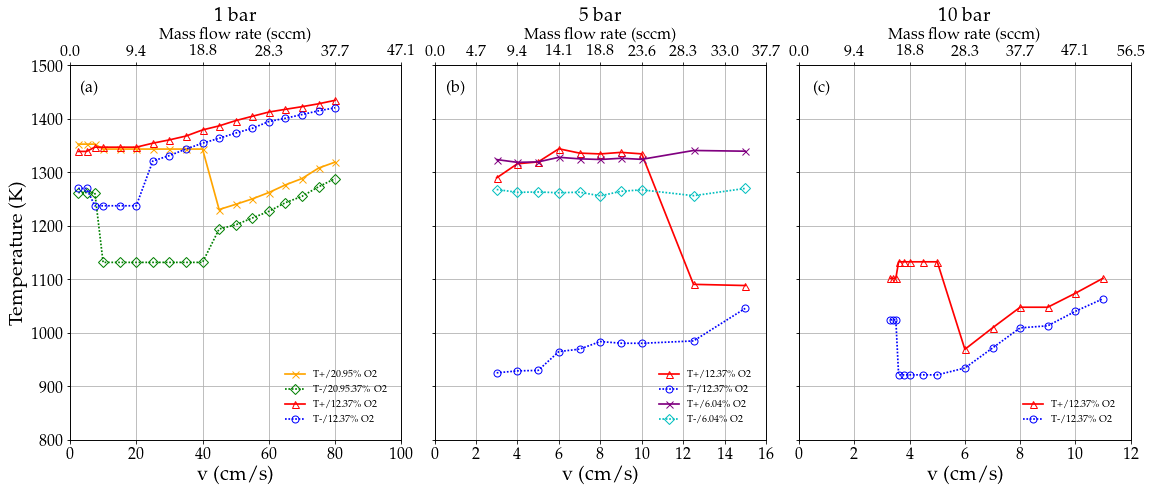

In [15]:
lw = 1.7
mv = MultipleLocator(100)
mh = MultipleLocator(100)
ht= 6
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['savefig.dpi'] = 500
fig,ax = plt.subplots(1,3)
fig.set_size_inches(16.,6,forward= False )
fig.subplots_adjust(hspace=0,wspace=0.1,
                    bottom=.15*4/ht,top=1-((1-.95)*4./ht),
                    left=.15/14.*6.,right=.985)
for i in range(2):
    ax[i+1].set_yticklabels([])


ax[0].plot(v1_21,Ti1_21,
                   linewidth=lw,
                   color = 'orange', markerfacecolor= 'none',
                   marker='x',markersize=7,
                   label='T+/20.95\% O2')

ax[0].plot(v1_21,Te1_21,
                   linewidth=lw,linestyle=(0, (1, 1)),
                   color = 'g',
                   marker='D',markersize=7,
                   markerfacecolor= 'none',
                   label='T-/20.95.37\% O2')
ax[0].plot(v1_12,Ti1_12,
                   linewidth=lw,
                   color = 'r', markerfacecolor= 'none',
                   marker='^',markersize=7,
                   label='T+/12.37\% O2')
ax[0].plot(v1_12,Te1_12,
                   linewidth=lw,linestyle=(0, (1, 1)),
                   color = 'b',
                   marker='o',markersize=7,
                   markerfacecolor= 'none',
                   label='T-/12.37\% O2')
ax[0].set_xticks(np.arange(0, max(v1_21)+21,20))
ax[0].set_xlim(0,100)
ax1 = ax[0].twiny()
ax1.set_xlim(ax[0].get_xlim())
print(ax[0].get_xlim())
ax1.set_xticks(np.arange(0, max(m1_21)+22,20))
ax1.set_xticklabels(tick_func(np.arange(0, max(m1_21)+22,20),0.4712385))
ax1.set_xlabel('Mass flow rate (sccm)')
#############################################################################################
ax[1].plot(v5_12,Ti5_12,
                   linewidth=lw,
                   color = 'r', markerfacecolor= 'none',
                   marker='^',markersize=7,
                   label='T+/12.37\% O2')

ax[1].plot(v5_12,Te5_12,
                   linewidth=lw,linestyle=(0, (1, 1)),
                   color = 'b',
                   marker='o',markersize=7,
                   markerfacecolor= 'none',
                   label='T-/12.37\% O2')
# ax[1].set_xlim([int(0),None])
ax[1].plot(v5_6,Ti5_6,
                   linewidth=lw,
                   color = 'purple', markerfacecolor= 'none',
                   marker='x',markersize=7,
                   label='T+/6.04\% O2')
ax[1].plot(v5_6,Te5_6,
                   linewidth=lw,linestyle=(0, (1, 1)),
                   color = 'c',
                   marker='D',markersize=7,
                   markerfacecolor= 'none',
                   label='T-/6.04\% O2')
ax[1].set_xticks(np.arange(0, max(v5_12)+2,2))
ax[1].set_xlim(0,16)
ax2 = ax[1].twiny()
ax2.set_xlim(ax[1].get_xlim())
print(ax[1].get_xlim())
ax2.set_xticks(np.arange(0, max(m5_12)+7,2))
ax2.set_xticklabels(tick_func(np.arange(0, max(m1_21)+7,2),2.3561925))
ax2.set_xlabel('Mass flow rate (sccm)')
#################################################################################
ax[2].plot(v10_12,Ti10_12,
                   linewidth=lw,
                   color = 'r', markerfacecolor= 'none',
                   marker='^',markersize=7,
                   label='T+/12.37\% O2')

ax[2].plot(v10_12,Te10_12,
                   linewidth=lw,linestyle=(0, (1, 1)),
                   color = 'b',
                   marker='o',markersize=7,
                   markerfacecolor= 'none',
                   label='T-/12.37\% O2')
ax[2].set_xticks(np.arange(0, max(v10_12)+2,2))
ax[2].set_xlim(0,12)
ax3 = ax[2].twiny()
ax3.set_xlim(ax[2].get_xlim())
print(ax[2].get_xlim())
ax3.set_xticks(np.arange(0, max(m10_12)+3,2))
ax3.set_xticklabels(tick_func(np.arange(0, max(m10_12)+3,2),4.712385))
ax3.set_xlabel('Mass flow rate (sccm)')
#######################################################################################
for x in range(3):
    ax[0].set_ylabel('Temperature (K)', fontsize = 20)
    ax[x].set_ylim(800, 1500)
    ax[x].set_xlim([0,None])
    ax[x].yaxis.set_minor_locator(mv)
    ax[x].xaxis.set_minor_locator(mh)
    ax[x].grid(b=None, which='major', axis='both')
    ax[x].set_facecolor('none')
    ax[x].set_xlabel('v (cm/s)', fontsize = 20) 
    ax[x].yaxis.set_minor_locator(mv)
    ax[x].xaxis.set_minor_locator(mh)
for x in range(3):
    leg = ax[x].legend(fancybox=True)
    leg.draw_frame(True)
    leg = ax[x].legend(loc=limits3['legend'],prop={'size':leg_fsize},title=labels['legend'],fancybox=True,framealpha=1, shadow=True, borderpad=1)
    leg.draw_frame(False)
    leg.draw_frame(False)
ax[0].text(3,1450,'(a)')
ax[1].text(0.55,1450,'(b)')
ax[2].text(0.5,1450,'(c)')    
ax[0].set_title('1 bar')
ax[1].set_title('5 bar')
ax[2].set_title('10 bar')
plt.setp(leg.get_title(),fontsize=leg_fsize)    

In [16]:
m1_21

[20, 40, 60, 80]